In [2]:
from visual_genome import api
import json
import requests
from visual_genome.models import (Image, Object, Attribute, Relationship,
                                  Region, Graph, QA, QAObject, Synset)
import visual_genome.utils as utils
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image as PIL_Image
import requests
import VG_100K
import os.path
import time

In [97]:
# Download scene_graphs.json from Visual Genome 
with open("scene_graphs.json", "r") as read_file:
    data = json.load(read_file)

In [98]:
len(data[0]['objects'])

40

In [3]:
with open("top_50_objects_scene_graphs.json", "r") as read_file:
    top50 = json.load(read_file)

In [5]:
len(top50)

101596

In [6]:
type(top50)

list

In [16]:
top50[0]['objects']

[{'synsets': ['clock.n.01'],
  'h': 339,
  'object_id': 1058498,
  'names': ['clock'],
  'w': 79,
  'attributes': ['green', 'tall'],
  'y': 91,
  'x': 421},
 {'synsets': ['street.n.01'],
  'h': 262,
  'object_id': 5046,
  'names': ['street'],
  'w': 714,
  'attributes': ['sidewalk'],
  'y': 328,
  'x': 77},
 {'synsets': ['man.n.01'],
  'h': 262,
  'object_id': 1058529,
  'names': ['man'],
  'w': 60,
  'y': 249,
  'x': 238},
 {'synsets': ['car.n.01'],
  'h': 98,
  'object_id': 5049,
  'names': ['car'],
  'w': 74,
  'y': 315,
  'x': 479},
 {'synsets': ['sign.n.02'],
  'h': 182,
  'object_id': 1058507,
  'names': ['sign'],
  'w': 88,
  'attributes': ['black'],
  'y': 13,
  'x': 118},
 {'synsets': ['building.n.01'],
  'h': 536,
  'object_id': 1058508,
  'names': ['building'],
  'w': 218,
  'attributes': ['tall', 'brick', 'made of bricks'],
  'y': 2,
  'x': 1},
 {'synsets': ['sidewalk.n.01'],
  'h': 266,
  'object_id': 1058534,
  'names': ['sidewalk'],
  'w': 722,
  'attributes': ['brick'],

In [35]:
top50[1]['objects']

[{'synsets': ['man.n.01'],
  'h': 255,
  'object_id': 1023838,
  'names': ['man'],
  'w': 142,
  'attributes': ['walking', 'white'],
  'y': 320,
  'x': 324},
 {'synsets': ['car.n.01'],
  'h': 126,
  'object_id': 1023836,
  'names': ['car'],
  'w': 136,
  'attributes': ['red', 'parked'],
  'y': 347,
  'x': 239},
 {'synsets': ['road.n.01'],
  'h': 279,
  'object_id': 1023841,
  'names': ['road'],
  'w': 372,
  'attributes': ['grey'],
  'y': 321,
  'x': 3},
 {'synsets': ['tree.n.01'],
  'h': 223,
  'object_id': 5074,
  'names': ['tree'],
  'w': 73,
  'attributes': ['green'],
  'y': 146,
  'x': 0},
 {'synsets': ['tree.n.01'],
  'h': 201,
  'object_id': 5075,
  'names': ['tree'],
  'w': 61,
  'attributes': ['green'],
  'y': 155,
  'x': 58},
 {'synsets': ['tree.n.01'],
  'h': 163,
  'object_id': 5076,
  'names': ['tree'],
  'w': 83,
  'attributes': ['green'],
  'y': 195,
  'x': 110},
 {'synsets': ['sidewalk.n.01'],
  'h': 247,
  'object_id': 1023813,
  'names': ['sidewalk'],
  'w': 415,
  'a

In [84]:
allname=[]
for j in range (0,len(top50)):
    for i in range(0,len(top50[j]['objects'])):
        allname.append(top50[j]['objects'][i]['names'][0])

In [30]:
from collections import Counter
quantity = Counter(allname)

In [93]:
sort = quantity.most_common()
for i in range(0,50):
    print(i+1,sort[i])

1 ('man', 94030)
2 ('person', 68902)
3 ('window', 68479)
4 ('tree', 48779)
5 ('building', 46624)
6 ('shirt', 46041)
7 ('wall', 44394)
8 ('woman', 41581)
9 ('sign', 40202)
10 ('sky', 39408)
11 ('ground', 38933)
12 ('grass', 32567)
13 ('table', 28908)
14 ('pole', 28159)
15 ('head', 27594)
16 ('light', 26588)
17 ('water', 26253)
18 ('car', 25759)
19 ('hand', 24791)
20 ('hair', 23147)
21 ('people', 22100)
22 ('leg', 21889)
23 ('trees', 20866)
24 ('clouds', 19701)
25 ('ear', 18046)
26 ('plate', 17987)
27 ('leaves', 17386)
28 ('door', 16530)
29 ('fence', 16515)
30 ('pants', 16454)
31 ('eye', 16239)
32 ('train', 15825)
33 ('floor', 15763)
34 ('chair', 15694)
35 ('road', 15520)
36 ('hat', 15356)
37 ('street', 15129)
38 ('snow', 15056)
39 ('wheel', 14453)
40 ('shadow', 14268)
41 ('jacket', 14158)
42 ('nose', 13199)
43 ('boy', 13167)
44 ('line', 12918)
45 ('shoe', 12665)
46 ('clock', 12496)
47 ('sidewalk', 12445)
48 ('tail', 12397)
49 ('boat', 12384)
50 ('cloud', 12195)


In [36]:
import csv
csvData = [['filename','width','height','class','xmin','ymin','xmax','ymax']]

In [43]:
with open("image_data.json", "r") as read_file:
    image_data = json.load(read_file)

In [64]:
image_data_index=[]
for i in range(0,len(image_data)):
    image_data_index.append(image_data[i]['image_id'])

In [69]:
image_data[1]['height']

600

In [87]:
csvData = [['filename','width','height','class','xmin','ymin','xmax','ymax']]
for i in range(50,55):
    for j in range (0,len(top50[i]['objects'])):
        filename = str(top50[i]['image_id'])+'.jpg'
        index = image_data_index.index(top50[i]['image_id'])
        width = image_data[index]['width']
        height = image_data[index]['height']
        classname =  top50[i]['objects'][j]['names'][0]
        xmin = top50[i]['objects'][j]['x']
        ymin = top50[i]['objects'][j]['y']
        xmax = xmin + top50[i]['objects'][j]['w']
        ymax = ymin + top50[i]['objects'][j]['h']
        temp=[filename,width,height,classname,xmin,ymin,xmax,ymax]
        csvData.append(temp)

In [90]:
len(csvData)

115

In [70]:
top50[0]['objects'][0]

{'synsets': ['clock.n.01'],
 'h': 339,
 'object_id': 1058498,
 'names': ['clock'],
 'w': 79,
 'attributes': ['green', 'tall'],
 'y': 91,
 'x': 421}

In [89]:
with open('test_label.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvData)
csvFile.close()

In [80]:
import pandas as pd
full_labels=pd.read_csv('first50_label.csv')

In [96]:
full_labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,1.jpg,800,600,clock,421,91,500,430
1,1.jpg,800,600,street,77,328,791,590
2,1.jpg,800,600,man,238,249,298,511
3,1.jpg,800,600,car,479,315,553,413
4,1.jpg,800,600,sign,118,13,206,195


In [ ]:
# Download relationships.json from Visual Genome 
with open("relationships.json", "r") as read_file:
    relation = json.load(read_file)

In [57]:
# Download image_id_file.txt from GitHub
# It saves the correlated image index in the list to image id
with open("top50_image_id_file.txt", "r") as read_file:
    lines = read_file.read().splitlines()

In [54]:
top50_id_list=[]
for i in range(0,len(top50)):
    top50_id_list.append(top50[i]['image_id'])

In [56]:
f = open('top50_image_id_file.txt', 'w')
for t in top50_id_list:
    line = str(t)
    f.write(line + '\n')
f.close()

In [91]:
import COCO

ModuleNotFoundError: No module named 'COCO'

In [27]:
with open("scene_graphs.json", "r") as read_file:
    data = json.load(read_file)
with open("image_id_file.txt", "r") as read_file:
    lines = read_file.read().splitlines()
# This function plot image of that id with region box and object names
def local_visualize_region_object(image_id,number_regions=9999):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    if os.path.isfile('VG_100K/'+str(image_id)+'.jpg') == True:
        image=plt.imread('VG_100K/'+str(image_id)+'.jpg')
    elif os.path.isfile('VG_100K_2/'+str(image_id)+'.jpg') == True:
        image=plt.imread('VG_100K_2/'+str(image_id)+'.jpg')
    else:
        print("image doesn't exist")
        return False
    plt.imshow(image)
    ax = plt.gca()
    if str(image_id) in lines == False:
        print ("regions for that image doesn't exist")
        return False
    index = lines.index(str(image_id))
    regions = data[index]['objects']
    count = 0
    for region in regions:
        ax.add_patch(Rectangle((region['x'],region['y']),
                              region['w'],
                              region['h'],
                              fill = False,
                              edgecolor='red',
                              linewidth = 3))
        ax.text(region['x'],region['y'],region['names'][0],style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
        count+=1
        if count>=number_regions:
            break
    fig = plt.gcf()
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.show()

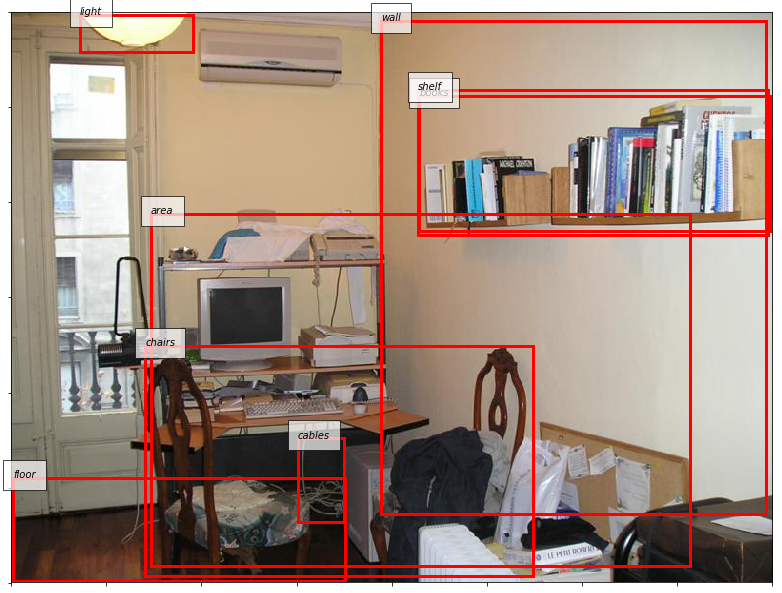

In [34]:
local_visualize_region_object(5,number_regions=8)# number of regions want to plot, here is 8